C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\548070291.py:6: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\548070291.py:41: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\548070291.py:41: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\548070291.py:41: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\548070291.py:41: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\U

        Column Name Data Type        Min        Max       Mean     Median  \
0         CrimeDate    object        NaN        NaN        NaN        NaN   
1         CrimeTime    object        NaN        NaN        NaN        NaN   
2         CrimeCode    object        NaN        NaN        NaN        NaN   
3          Location    object        NaN        NaN        NaN        NaN   
4       Description    object        NaN        NaN        NaN        NaN   
5    Inside/Outside    object        NaN        NaN        NaN        NaN   
6            Weapon    object        NaN        NaN        NaN        NaN   
7              Post    object        NaN        NaN        NaN        NaN   
8          District    object        NaN        NaN        NaN        NaN   
9      Neighborhood    object        NaN        NaN        NaN        NaN   
10        Longitude   float64 -81.529189 -76.383228 -76.617452 -76.613977   
11         Latitude   float64  37.577262  39.661332  39.306746  39.302672   

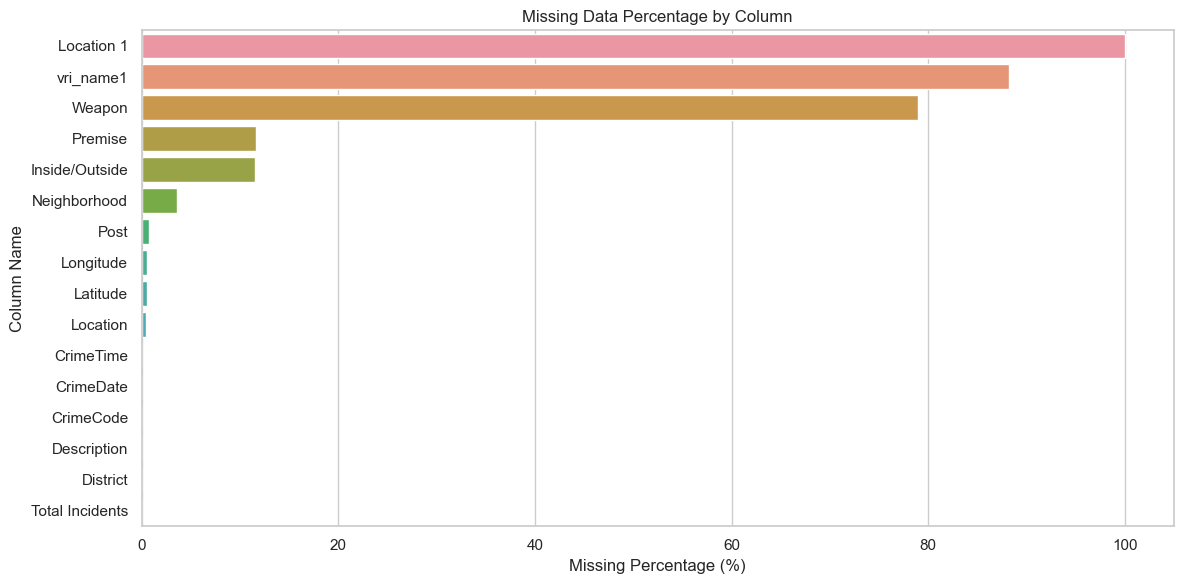

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Baltimore911.csv")

# Total number of call instances/rows
total_rows = len(df)

# Total number of call features/columns
total_columns = len(df.columns)

# Create an empty DataFrame to store the profile information
profile_df = pd.DataFrame(columns=["Column Name", "Data Type", "Min", "Max", "Mean", "Median", "Std Deviation", "Unique Values", "Top 3 Values", "Missing %"])

# Iterate through each column in the DataFrame
for col in df.columns:
    data_type = df[col].dtype

    # Check if the column is numeric/real/continuous
    if data_type in ["int64", "float64"]:
        min_val = df[col].min()
        max_val = df[col].max()
        mean_val = df[col].mean()
        median_val = df[col].median()
        std_dev = df[col].std()
        unique_vals = None  # Numeric columns don't have unique values
        top_3_vals = None  # Numeric columns don't have top values
        missing_percent = df[col].isnull().mean() * 100
    else:
        min_val = None
        max_val = None
        mean_val = None
        median_val = None
        std_dev = None
        unique_vals = df[col].nunique()
        top_3_vals = df[col].value_counts().head(3).index.tolist()
        missing_percent = df[col].isnull().mean() * 100

    profile_df = profile_df.append({
        "Column Name": col,
        "Data Type": data_type,
        "Min": min_val,
        "Max": max_val,
        "Mean": mean_val,
        "Median": median_val,
        "Std Deviation": std_dev,
        "Unique Values": unique_vals,
        "Top 3 Values": top_3_vals,
        "Missing %": missing_percent
    }, ignore_index=True)

# Set the style for visualizations
sns.set(style="whitegrid")

# Create a bar chart for missingness percentage
plt.figure(figsize=(12, 6))
sns.barplot(x="Missing %", y="Column Name", data=profile_df.sort_values(by="Missing %", ascending=False))
plt.xlabel("Missing Percentage (%)")
plt.ylabel("Column Name")
plt.title("Missing Data Percentage by Column")
plt.tight_layout()

# Save the bar chart to an image file
plt.savefig("missing_data_percentage.png")

# Display the entire dataset profile DataFrame without truncation
pd.set_option('display.max_rows', None)
print(profile_df)

# Save the profile information to a CSV file if needed
# profile_df.to_csv("dataset_profile.csv", index=False)

# Show the missing data bar chart
plt.show()

C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\4188904841.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Baltimore911.csv")


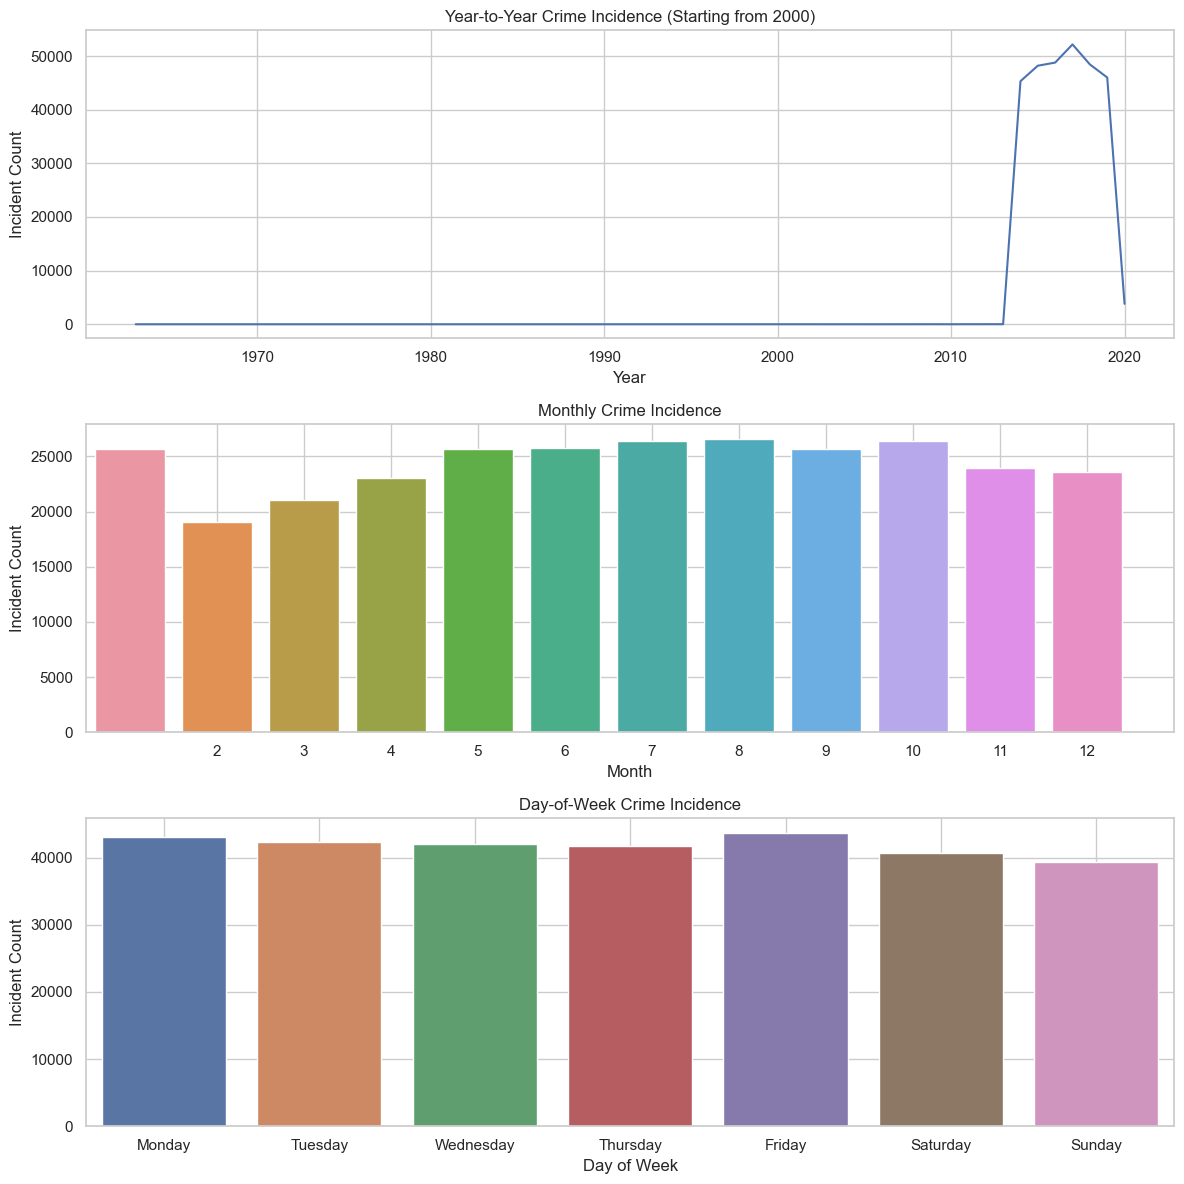

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Baltimore911.csv")

# Convert the "CrimeDate" column to datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract year, month, and day-of-week from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.strftime('%A')  # Get the full day name

# Filter the data to include only years starting from 2000
# df = df[df['Year'] >= 2000]

# Create subplots for year-to-year, monthly, and day-of-week patterns
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Year-to-year pattern
yearly_counts = df['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, ax=axes[0])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Incident Count")
axes[0].set_title("Year-to-Year Crime Incidence (Starting from 2000)")
axes[0].grid(True)

# Monthly pattern
monthly_counts = df['Month'].value_counts().sort_index()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, ax=axes[1])
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Incident Count")
axes[1].set_title("Monthly Crime Incidence")
axes[1].set_xticks(range(1, 13))
axes[1].grid(True)

# Day-of-week pattern
day_of_week_counts = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, ax=axes[2])
axes[2].set_xlabel("Day of Week")
axes[2].set_ylabel("Incident Count")
axes[2].set_title("Day-of-Week Crime Incidence")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()



C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\929858169.py:6: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



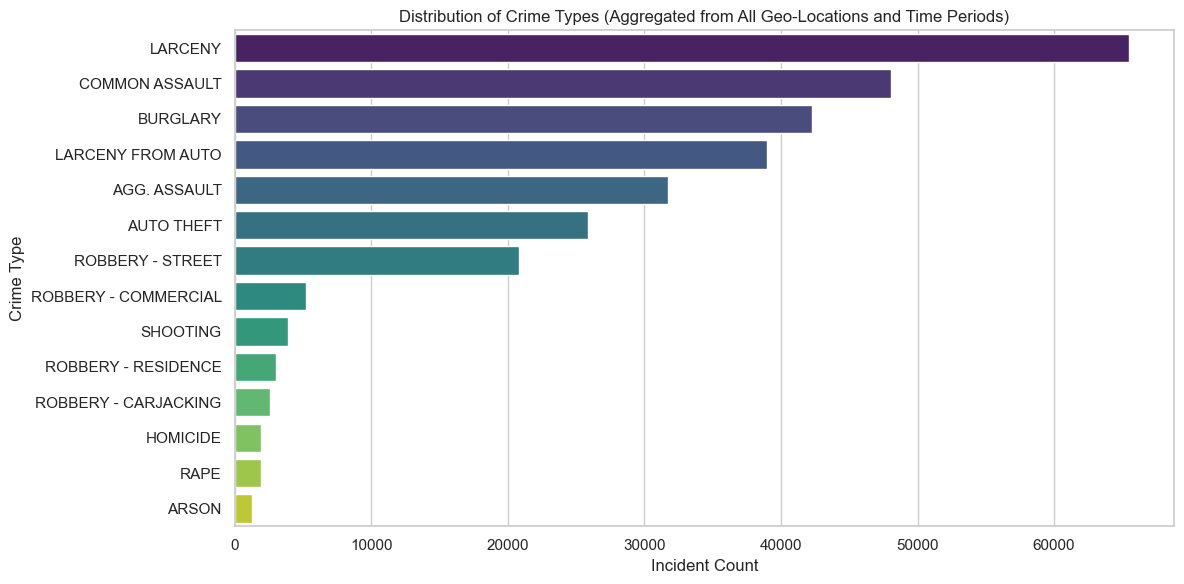

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the crime dataset into a Pandas DataFrame
df = pd.read_csv("Baltimore911.csv")

# Create a bar plot for crime type distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Description", order=df["Description"].value_counts().index, palette="viridis")
plt.xlabel("Incident Count")
plt.ylabel("Crime Type")
plt.title("Distribution of Crime Types (Aggregated from All Geo-Locations and Time Periods)")
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\1090491390.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Baltimore911.csv")


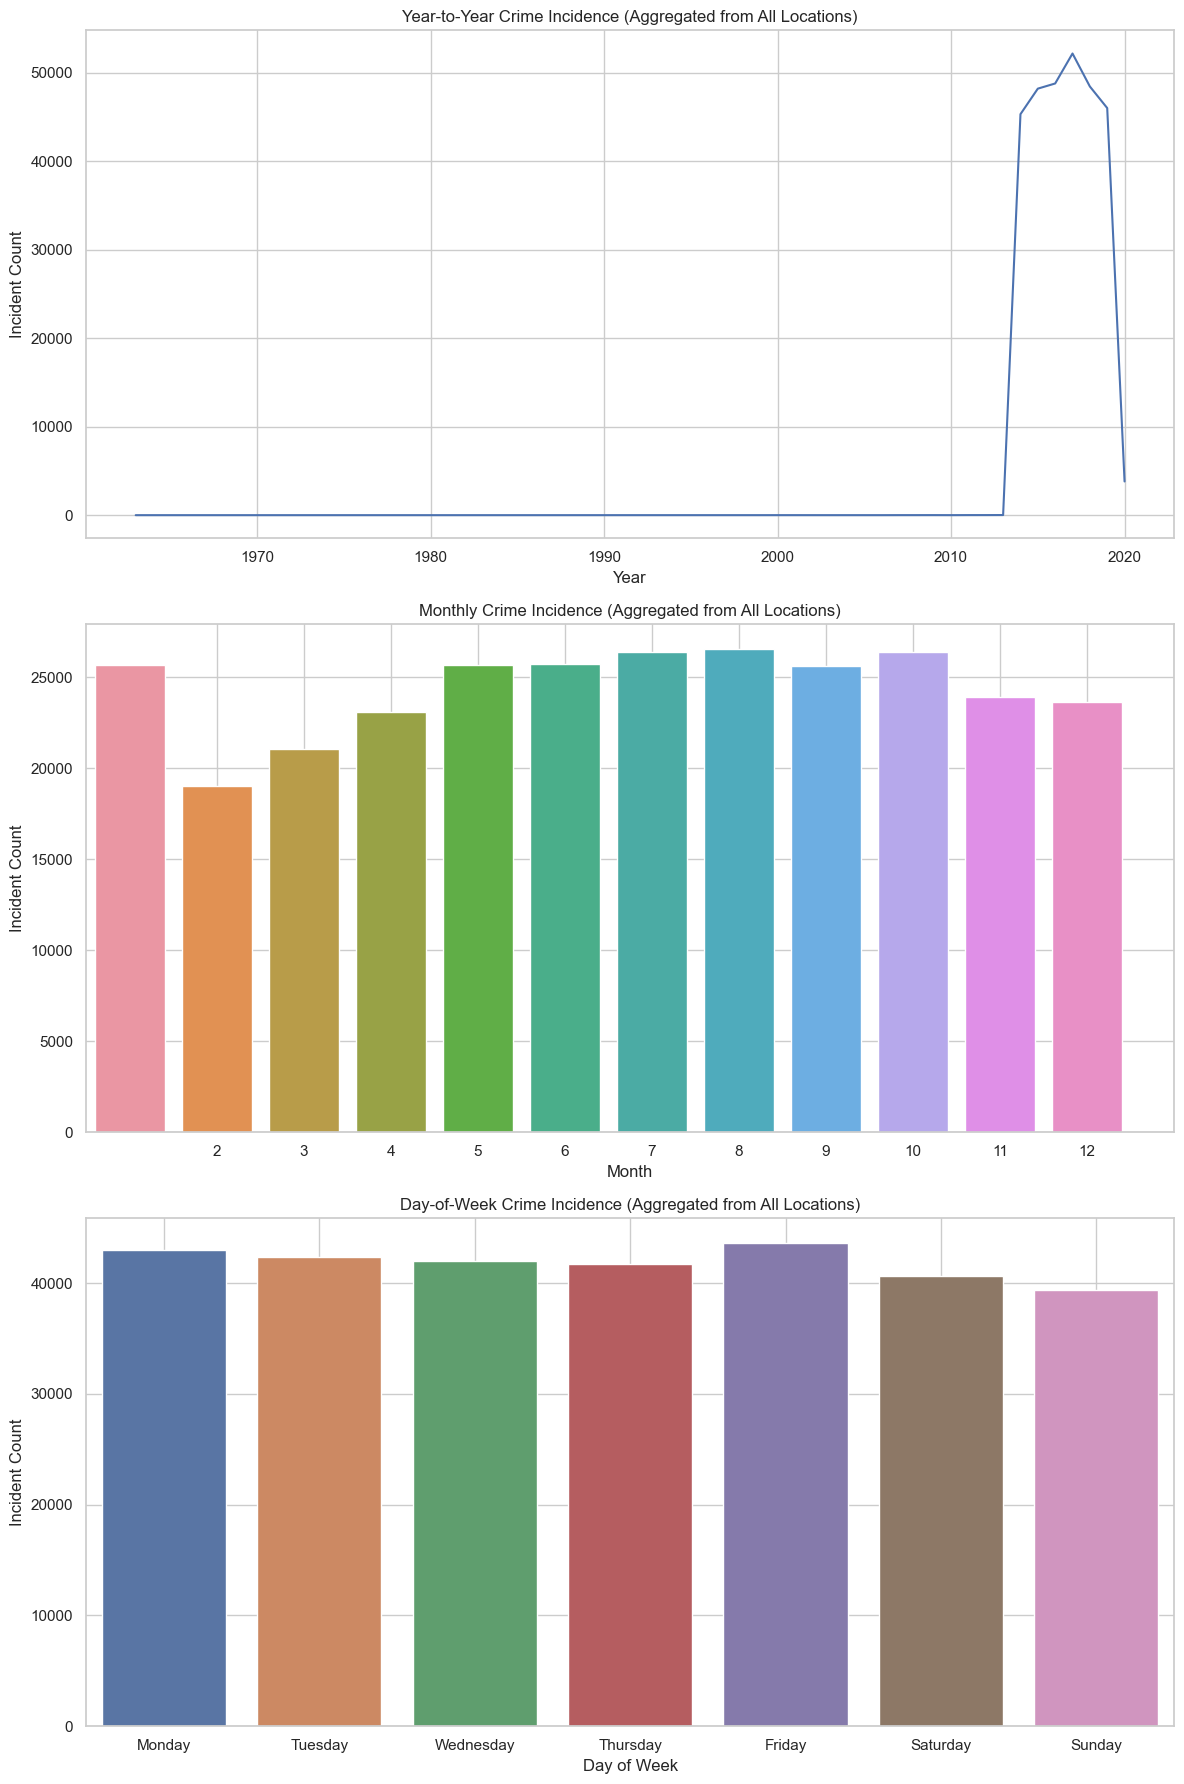

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Baltimore911.csv")

# Convert the "CrimeDate" column to datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract year, month, and day-of-week from the "CrimeDate" column
df['Year'] = df['CrimeDate'].dt.year
df['Month'] = df['CrimeDate'].dt.month
df['DayOfWeek'] = df['CrimeDate'].dt.strftime('%A')  # Get the full day name

# Create subplots for year-to-year, monthly, and day-of-week patterns
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Year-to-year pattern
yearly_counts = df['Year'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, ax=axes[0])
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Incident Count")
axes[0].set_title("Year-to-Year Crime Incidence (Aggregated from All Locations)")
axes[0].grid(True)

# Monthly pattern
monthly_counts = df['Month'].value_counts().sort_index()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, ax=axes[1])
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Incident Count")
axes[1].set_title("Monthly Crime Incidence (Aggregated from All Locations)")
axes[1].set_xticks(range(1, 13))
axes[1].grid(True)

# Day-of-week pattern
day_of_week_counts = df['DayOfWeek'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, ax=axes[2])
axes[2].set_xlabel("Day of Week")
axes[2].set_ylabel("Incident Count")
axes[2].set_title("Day-of-Week Crime Incidence (Aggregated from All Locations)")
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [18]:
import dash
from dash import dcc, html
import pandas as pd
import plotly.express as px

# Load and preprocess the crime dataset
df = pd.read_csv("Baltimore911.csv")
# Perform data preprocessing here

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Crime Analysis Dashboard"),
    
    # Tabs for different analysis sections
    dcc.Tabs([
        # Temporal Analysis tab
        dcc.Tab(label='Temporal Analysis', children=[
            html.Div([
                # Temporal analysis plot (line chart)
                dcc.Graph(
                    id='temporal-analysis',
                    config={'displayModeBar': False},  # Hide the mode bar for cleaner UI
                    # Add your temporal analysis plot here using Plotly Express or Plotly Graph objects
                ),
                
                # Add interactive elements and insights for temporal analysis here
            ]),
        ]),
        
        # Spatial Analysis tab
        dcc.Tab(label='Spatial Analysis', children=[
            html.Div([
                # Spatial analysis map
                dcc.Graph(
                    id='spatial-analysis',
                    config={'scrollZoom': False},  # Disable scroll zoom for map
                    # Add your spatial analysis map here using Plotly Express or Plotly Graph objects
                ),
                
                # Add interactive elements and insights for spatial analysis here
            ]),
        ]),
        
        # Insights tab (to display key findings)
        dcc.Tab(label='Insights', children=[
            # Add insights and summary statistics here
        ]),
    ]),
])

# Define callback functions for interactivity if needed

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\aksherman\AppData\Local\Temp\ipykernel_10592\1603053397.py:7: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [16]:
pip install dash



SyntaxError: invalid syntax (3582120581.py, line 1)